In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
df = pd.read_csv("diabetes (2).csv")

In [62]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
coorelation = df.corr()
coorelation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


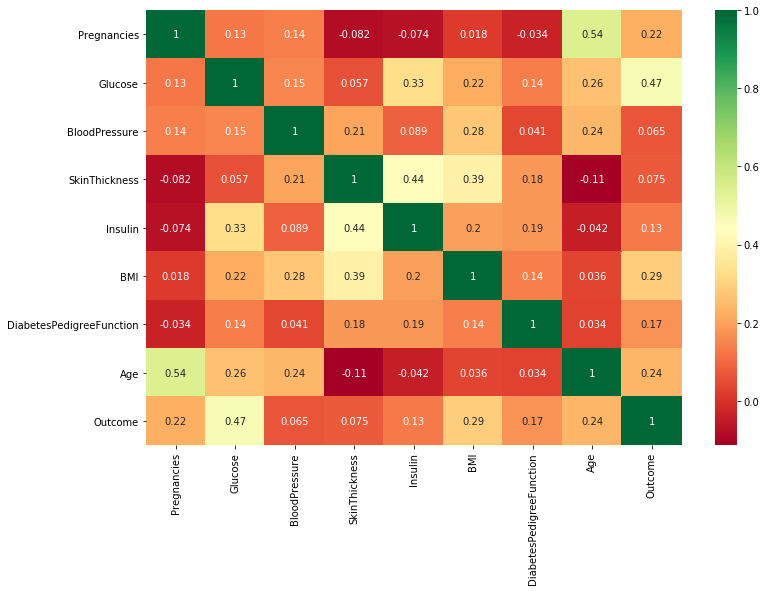

In [387]:
plt.figure(figsize=(12,8))
sns.heatmap(data=coorelation,cmap="RdYlGn",annot=True)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# DATA ANALYSIS OF UNCLEAN DATA

In [102]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


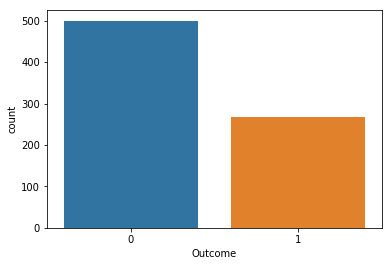

In [103]:
#Number of occurence 
sns.countplot(x="Outcome",data=df)

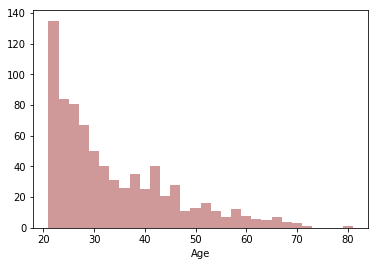

In [107]:
#Distribution of Age in the dataset
sns.distplot(df["Age"],kde=False,bins=30,color='darkred')

In [131]:
#Uneven distribution of outcomes
df[df["Outcome"]==0].count()

Pregnancies                 500
Glucose                     500
BloodPressure               500
SkinThickness               500
Insulin                     500
BMI                         500
DiabetesPedigreeFunction    500
Age                         500
Outcome                     500
dtype: int64

In [132]:
df[df["Outcome"]==1].count()

Pregnancies                 268
Glucose                     268
BloodPressure               268
SkinThickness               268
Insulin                     268
BMI                         268
DiabetesPedigreeFunction    268
Age                         268
Outcome                     268
dtype: int64

C:\Users\Naman Jogani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Naman Jogani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


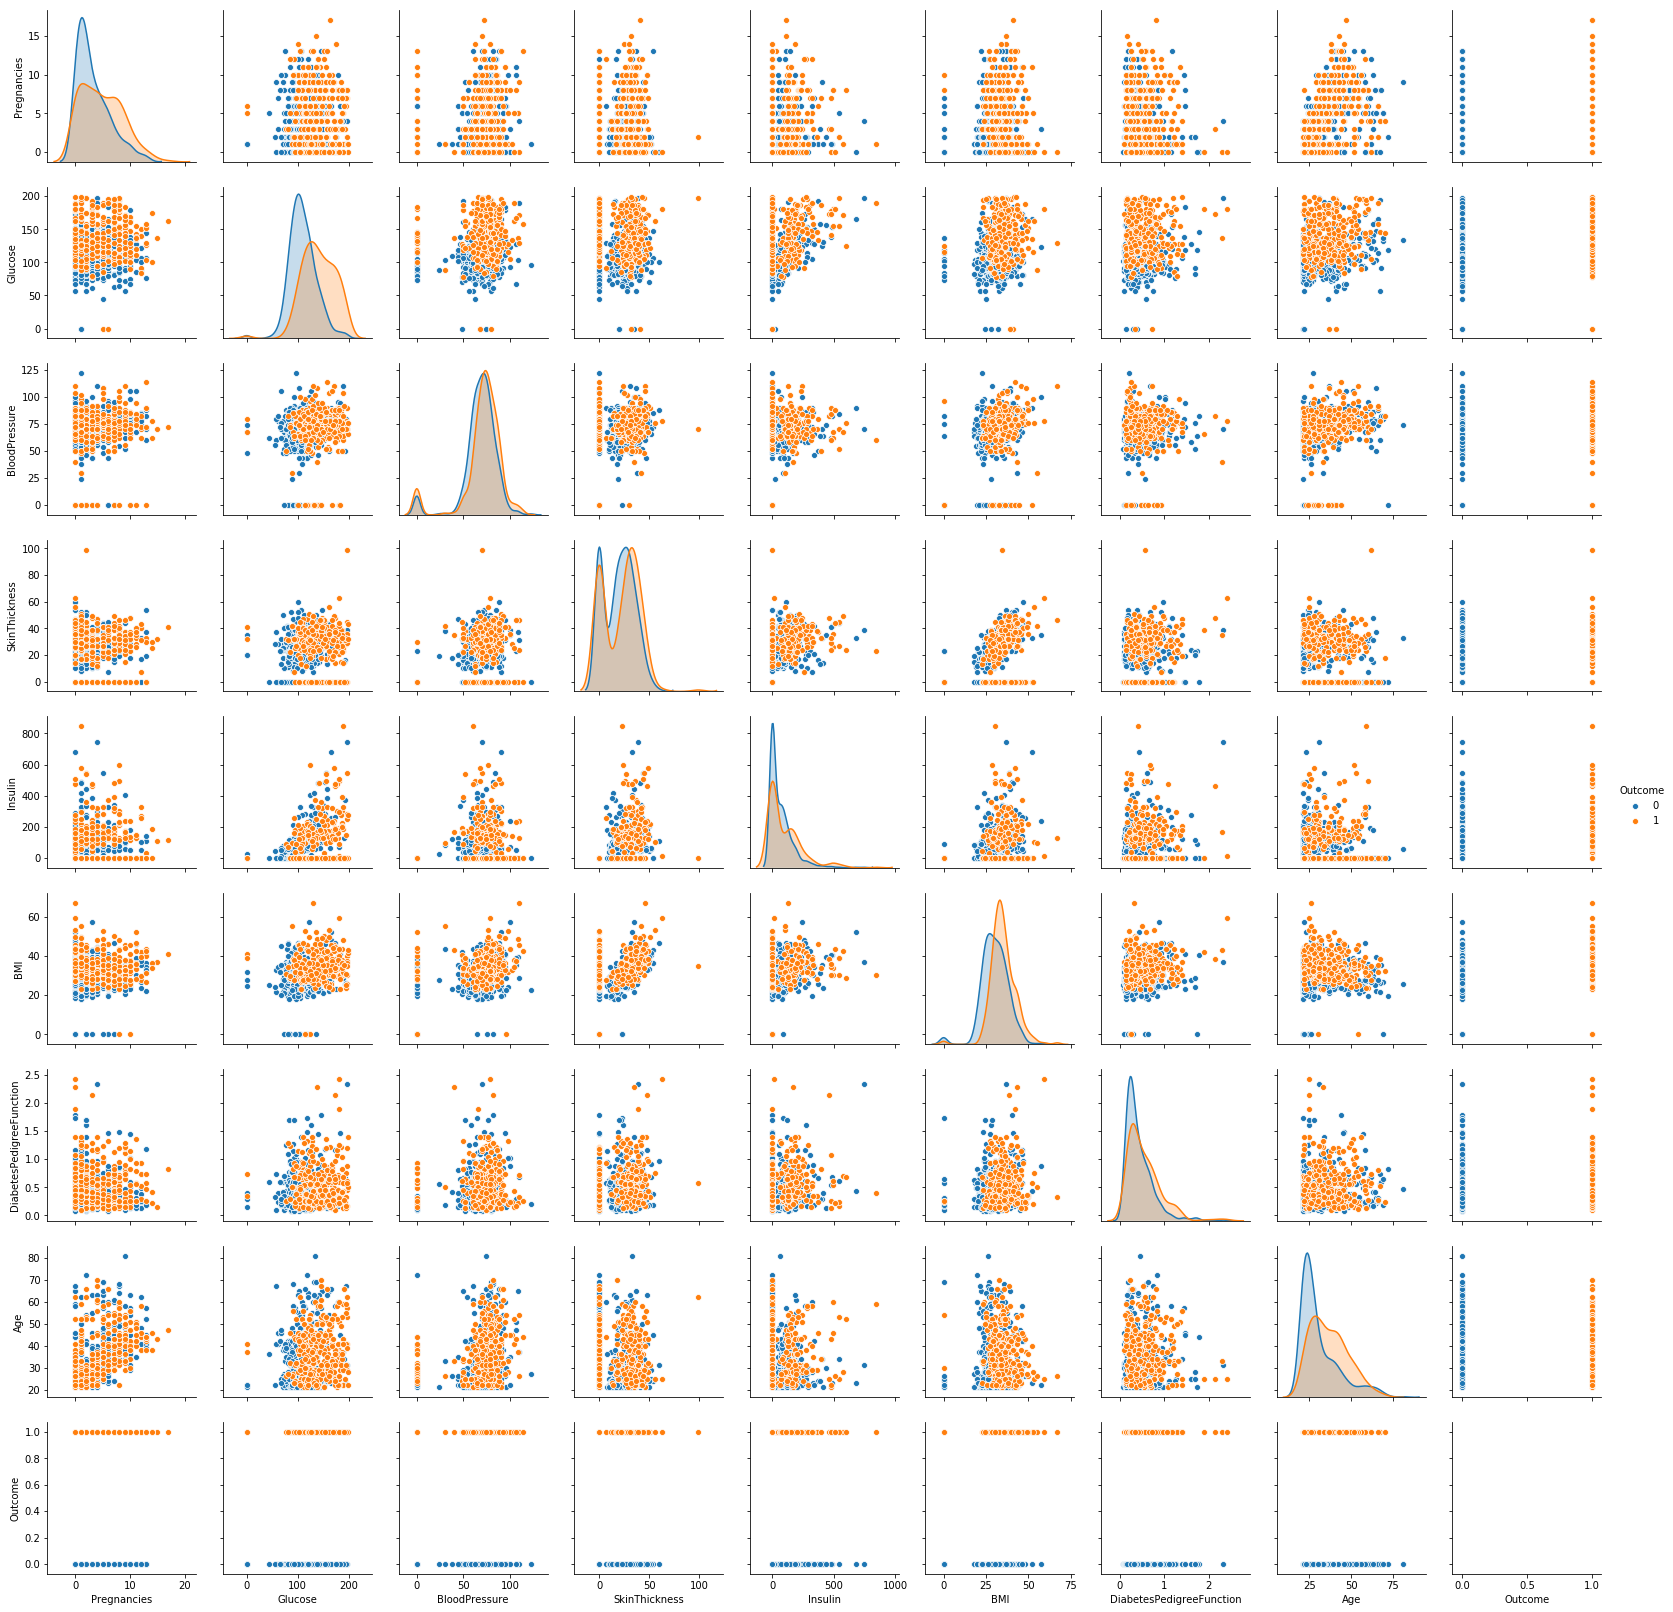

In [134]:
sns.pairplot(df,hue="Outcome")

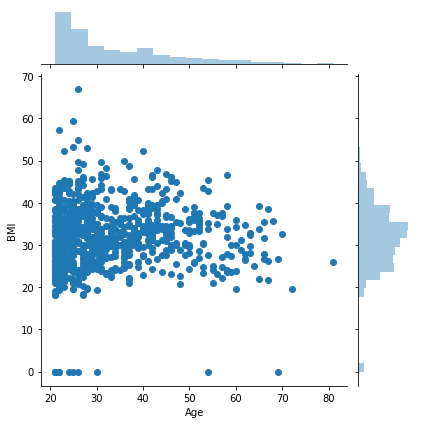

In [142]:
sns.jointplot(x="Age",y="BMI",data=df)

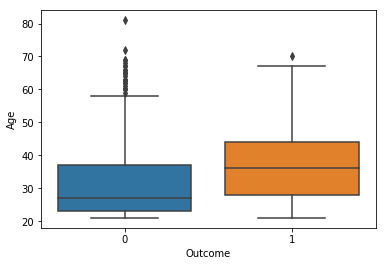

In [143]:
sns.boxplot(x="Outcome",y="Age",data=df)

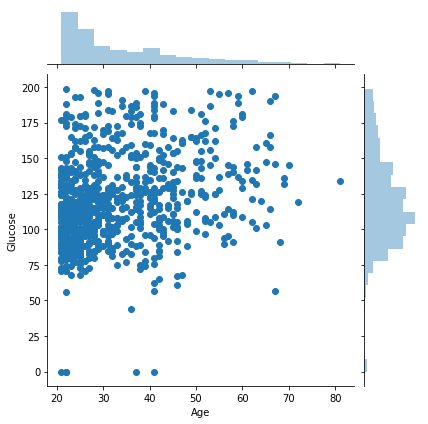

In [144]:
sns.jointplot(x="Age",y="Glucose",data=df)

In [148]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# KNN IMPUTATION OF MISSING OR NULL VALUES

In [217]:
#Min values of zero do not make sense for the following columns of Glucose,BloodPressure,Skin Thickness,Insuling,BMI
new=pd.DataFrame()
new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [218]:
print(new.isnull().sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [221]:
from sklearn.impute import KNNImputer


In [222]:
#KNN IMPUTATION FOR MISSING VALUES TO FILL IN THE VALUES THAT SHARE THE SIMILAR CHARACTERISTIC
imputer = KNNImputer(n_neighbors=2)
new= imputer.fit_transform(new)

In [223]:
new=pd.DataFrame(new)

In [238]:
#RENAMING THE COLUMNS
new = new.rename(columns={0:"Glucose",1:"BloodPressure",2:"SkinThickness",3:"Insulin",4:"BMI"})


In [250]:
#DROPPING THE ORIGINAL COLUMNS THAT ARE ALREADY PRESENT IN THE "NEW" DATAFRAME
dropped = df.drop(["Glucose","BloodPressure","SkinThickness","Insulin","BMI"],axis=1)

In [255]:
#CONCATTANATING THE COLUMNS TO NEW WITH THE COLUMNS THAT HAD NO MISSING VALUES
result = pd.concat([dropped, new], axis=1)

In [270]:
# FINAL DATAFRAME WITH NO MISSING VALUES AND COMPLETED KNN IMPUTATION
result.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.688802,72.375651,28.774740,148.895833,32.477083,0.471876,33.240885,0.348958
std,3.369578,30.468444,12.266881,9.735051,102.902279,6.918492,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,80.375000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.350000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,183.625000,36.625000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [271]:
#REARRANGING THE COLUMN NAMES TO ORIGINAL DATAFRAME "DF"
result = result[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

# DATA ANALYSIS OF CLEAN DATA WITHOUT MISSING VALUES

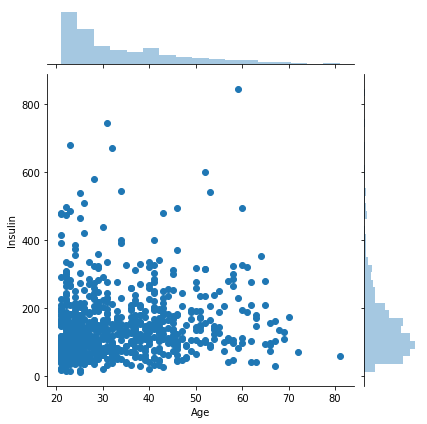

In [272]:
sns.jointplot(x="Age",y="Insulin",data=result)

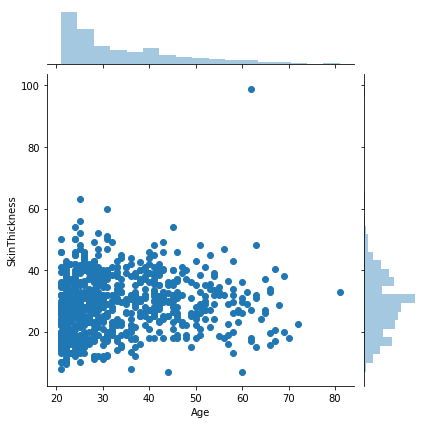

In [274]:
sns.jointplot(x="Age",y="SkinThickness",data=result)

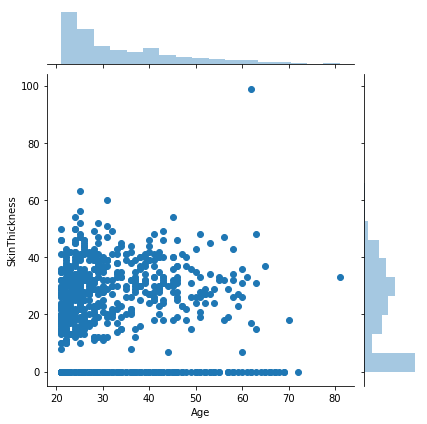

In [275]:
sns.jointplot(x="Age",y="SkinThickness",data=df)

C:\Users\Naman Jogani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Naman Jogani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


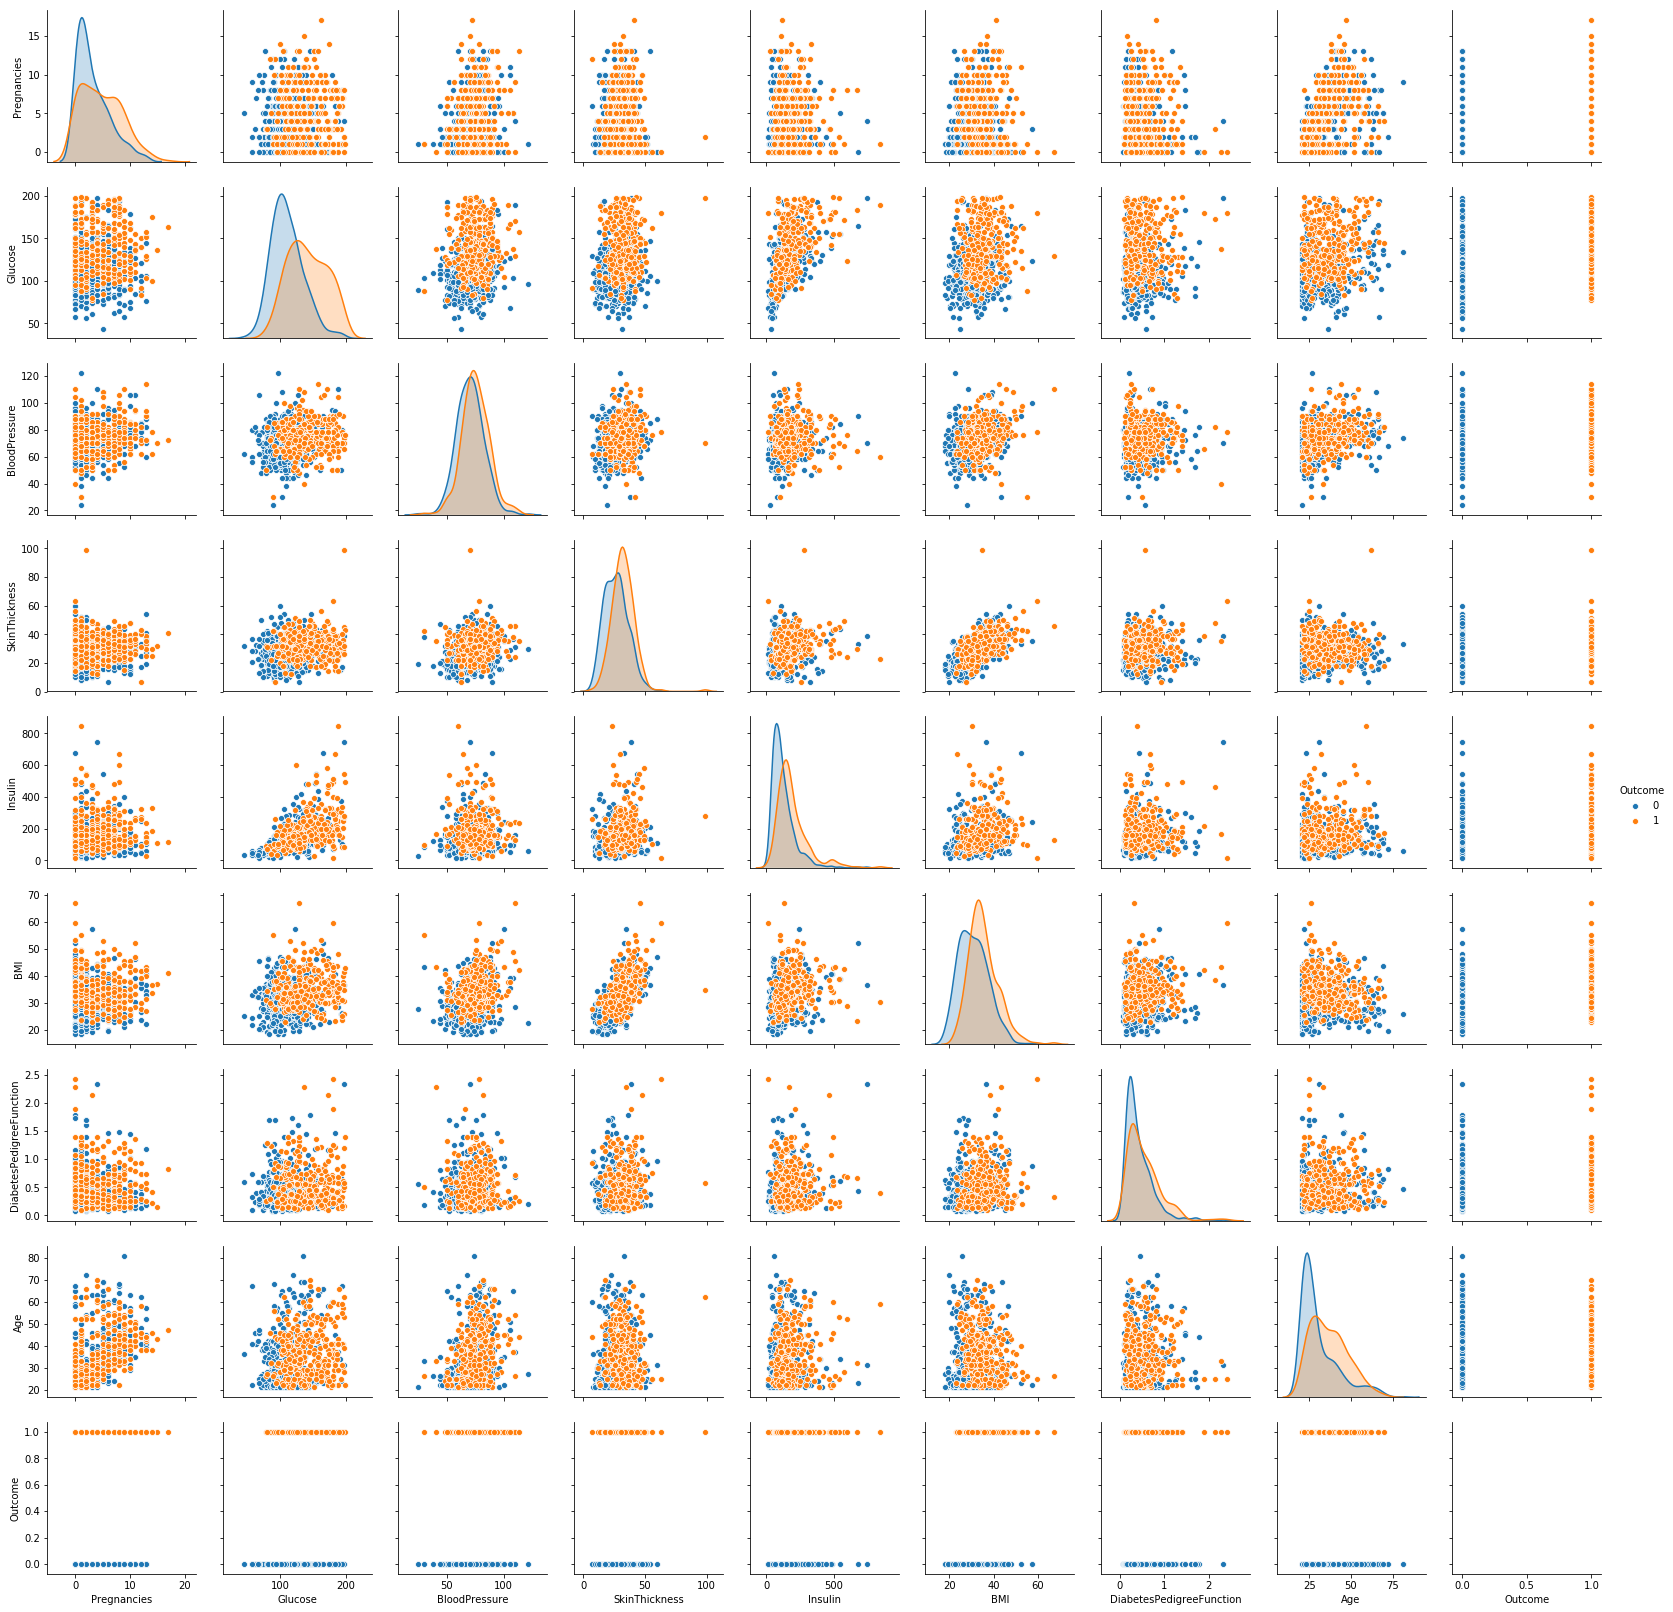

In [277]:
sns.pairplot(data=result,hue="Outcome")

In [381]:
result.groupby(by="Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.771000,70.747000,26.805000,125.342000,30.906400,0.429734,31.190000
1,4.865672,142.057836,75.414179,32.449627,192.839552,35.407463,0.550500,37.067164


In [383]:
df.groupby(by="Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


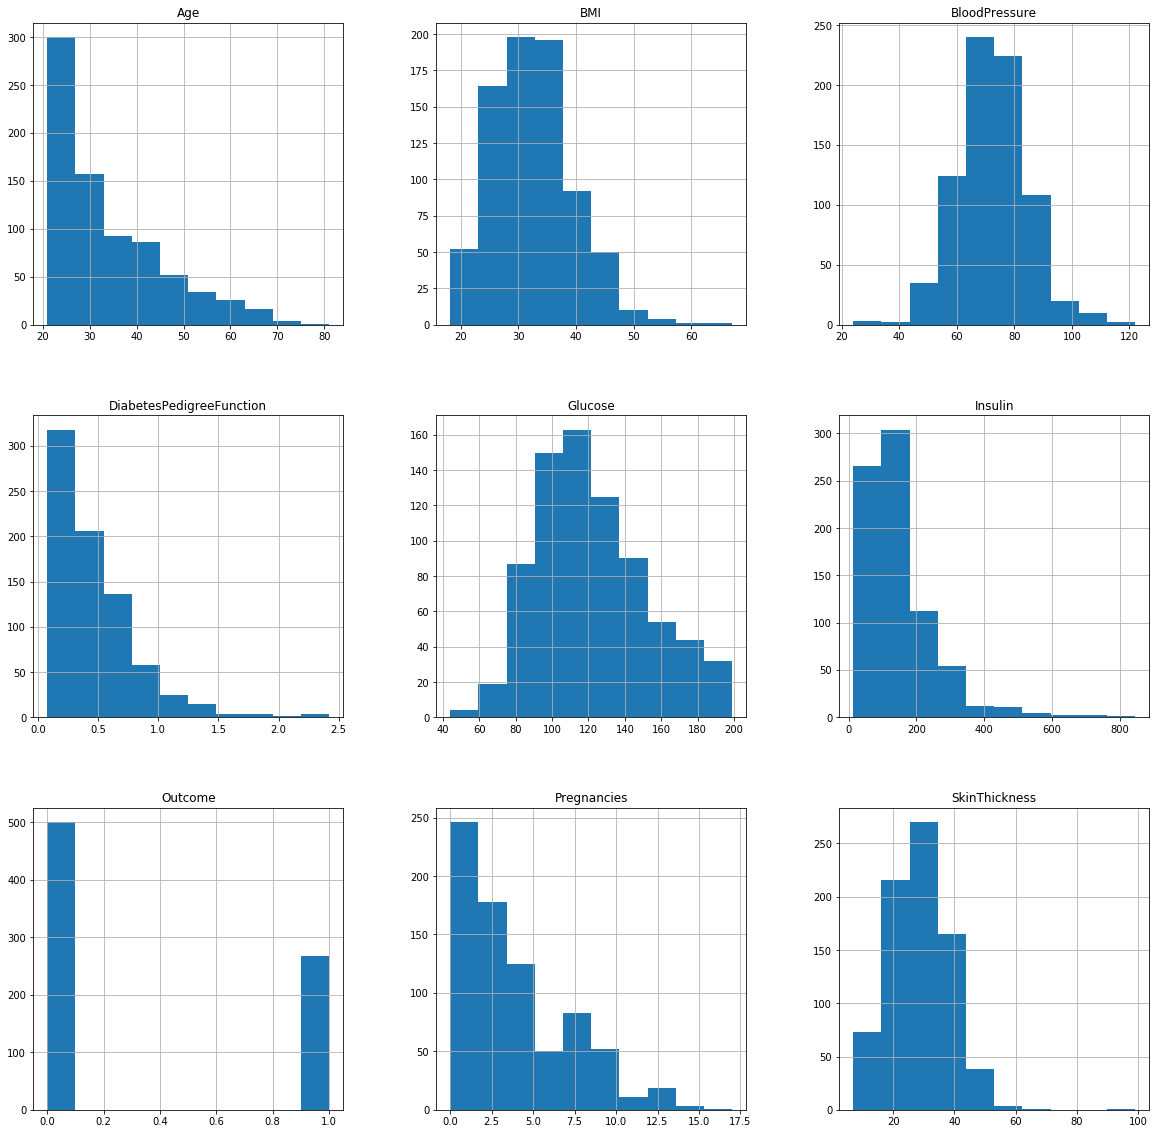

In [279]:
p = result.hist(figsize = (20,20))

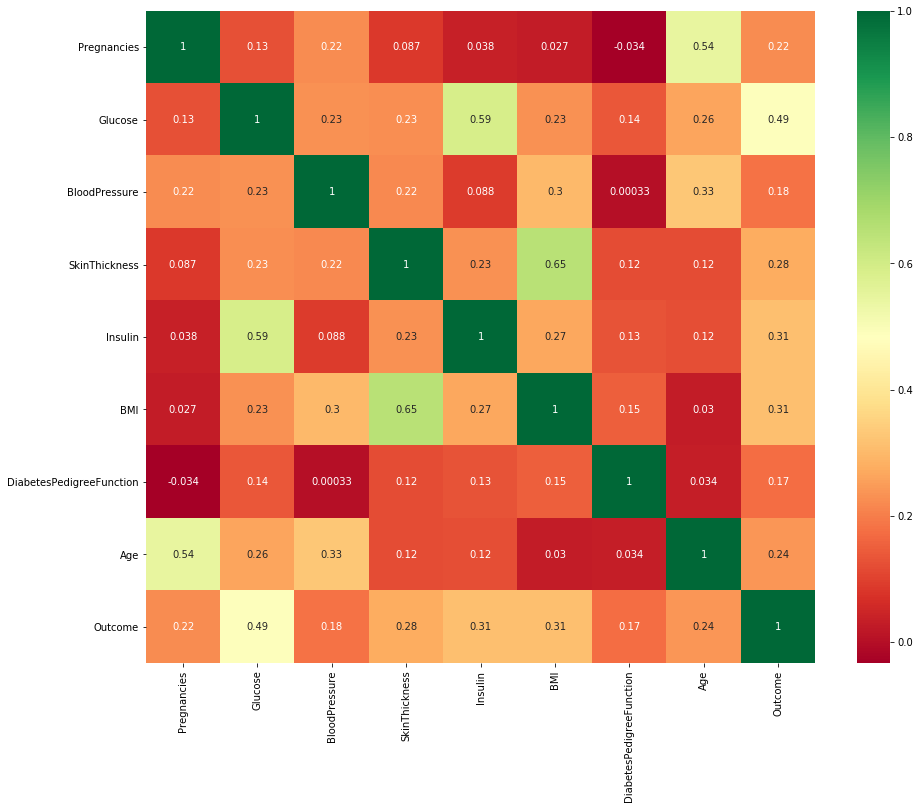

In [284]:
plt.figure(figsize=(15,12))
sns.heatmap(result.corr(),cmap ='RdYlGn',annot=True)

# CHECKING MULTICOLINEARITY THROUGH VIF

In [286]:
#Checkin multicolinearity
C = result[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
C["Intercept"]=1

In [287]:
vif = pd.DataFrame()
vif["variables"] = C.columns
vif["VIF"] = [variance_inflation_factor(C.values, i) for i in range(C.shape[1])]

In [289]:
#No Multicolinearity since all the VIF values are below 2
print(vif)

                  variables        VIF
0               Pregnancies   1.433686
1                   Glucose   1.691429
2             BloodPressure   1.273441
3             SkinThickness   1.778923
4                   Insulin   1.605392
5                       BMI   1.922323
6  DiabetesPedigreeFunction   1.044508
7                       Age   1.606101
8                 Intercept  53.694639


In [318]:
x = result.iloc[:,:-1]
y= result.iloc[:,-1]

In [319]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,277.0,33.60,0.627,50
1,1,85.0,66.0,29.0,88.5,26.60,0.351,31
2,8,183.0,64.0,29.5,670.5,23.30,0.672,32
3,1,89.0,66.0,23.0,94.0,28.10,0.167,21
4,0,137.0,40.0,35.0,168.0,43.10,2.288,33
5,5,116.0,74.0,17.5,64.0,25.60,0.201,30
6,3,78.0,50.0,32.0,88.0,31.00,0.248,26
7,10,115.0,74.0,29.5,138.0,35.30,0.134,29
8,2,197.0,70.0,45.0,543.0,30.50,0.158,53
9,8,125.0,96.0,38.0,149.0,27.25,0.232,54


In [290]:
from sklearn.preprocessing import StandardScaler

In [305]:
scaler = StandardScaler()

In [316]:
x = scaler.fit_transform(x)

In [320]:
x = pd.DataFrame(scaler.fit_transform(x),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [323]:
from sklearn.model_selection import train_test_split

In [324]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [326]:
from sklearn.neighbors import KNeighborsClassifier

In [328]:
knn = KNeighborsClassifier()

# ELBOW METHOD TO IDENTIFY THE BEST K MEANS NEIGHBORS

In [331]:
#ELBOW METHOD TO IDENTIFY THE BEST NEIGHBORS
error_log = []
for i in range(1,40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_log.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

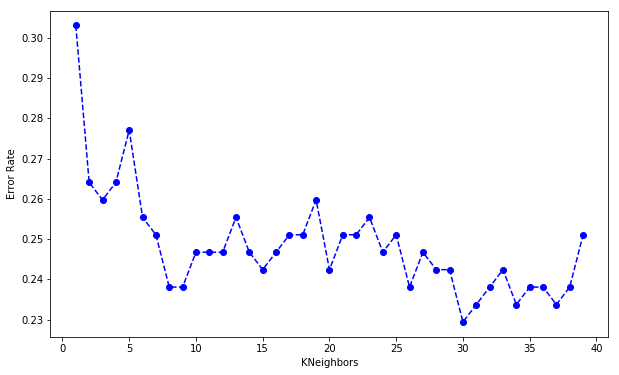

In [342]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_log,color='blue',linestyle='dashed',marker="o")
plt.xlabel("KNeighbors")
plt.ylabel("Error Rate")
#ANALYSIS--Identification that 30 neighbors for this particular dataset would yeild an optimal error rate

In [360]:
k_new = KNeighborsClassifier(n_neighbors=30)

In [361]:
k_new.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [362]:
pred = k_new.predict(X_test)

In [363]:
from sklearn.metrics import classification_report

In [364]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       157
           1       0.73      0.45      0.55        74

    accuracy                           0.77       231
   macro avg       0.76      0.68      0.70       231
weighted avg       0.76      0.77      0.75       231



In [365]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred)

0.6847564124634189

In [367]:
from sklearn.metrics import confusion_matrix

In [368]:
print(confusion_matrix(y_test,pred))

[[145  12]
 [ 41  33]]


# IMBALANCE IN DATASET HANDLING (OVERSAMPLING AND UNDERSAMPLING)

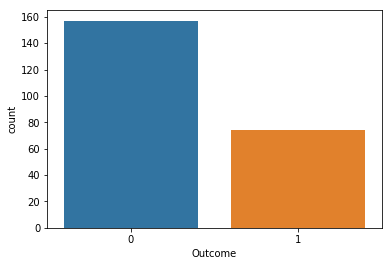

In [394]:
sns.countplot(y_test)

In [395]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  

Before OverSampling, counts of label '1': 194
Before OverSampling, counts of label '0': 343 



In [396]:
from imblearn.over_sampling import SMOTE

In [397]:
sm = SMOTE(random_state=2)

In [398]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [399]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, counts of label '1': 343
After OverSampling, counts of label '0': 343


In [400]:
k_res=KNeighborsClassifier(n_neighbors=30)

In [401]:
k_res.fit(X_train_res,y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [404]:
sm_pred = k_res.predict(X_test)

In [405]:
print(classification_report(y_test,sm_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       157
           1       0.57      0.64      0.60        74

    accuracy                           0.73       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.74      0.73      0.73       231



In [406]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 

In [409]:
K_mis=KNeighborsClassifier(n_neighbors=30)

In [410]:
K_mis.fit(X_train_miss,y_train_miss)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [414]:
k_mis_pred = K_mis.predict(X_test)

In [416]:
print(classification_report(y_test,k_mis_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.63      0.53      0.57        74

    accuracy                           0.75       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



# GRIDSEARCH CROSS VALIDATION

In [417]:
from sklearn.model_selection import GridSearchCV

In [425]:
#import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50),
             'weights':['uniform','distance'],
             'metric':['minkowski','euclidean']}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [426]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [427]:
knn_cv.best_score_

0.7727414330218068

In [429]:
knn_cv.best_params_

{'metric': 'minkowski', 'n_neighbors': 23, 'weights': 'uniform'}

In [430]:
k_best = KNeighborsClassifier(n_neighbors=23)

In [431]:
k_best.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [432]:
best_pred = k_best.predict(X_test)

In [433]:
print(classification_report(y_test,best_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       157
           1       0.65      0.43      0.52        74

    accuracy                           0.74       231
   macro avg       0.71      0.66      0.67       231
weighted avg       0.73      0.74      0.73       231

